## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

##Data Clean
###Analyzing the Given Data

In [ ]:
print(df.shape)
df.head()

(52, 6)


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

###Checking There is Any Null Data in Give Data Set

In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

###Finding is There Any Dulicate Rows And Colunms Are Presented In Given Data Set

In [ ]:
df.duplicated().sum()

0

###There is No Duplicate Datas In Given Data Set, Now We Can Move Forward to Exploratory Data Analysis

#Exploratory Data Analysis
###Finding Ouliers in Given Data Set By Two Way
>>1. Visualization of The Data Points In Boxplot
>>2. By Finding Interquartile Range $IQR$

###Box Plot Method

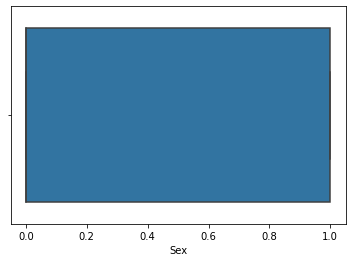

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Sex"])

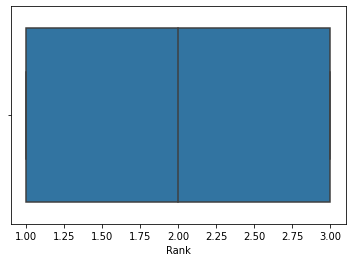

In [ ]:
sns.boxplot(x = df["Rank"])

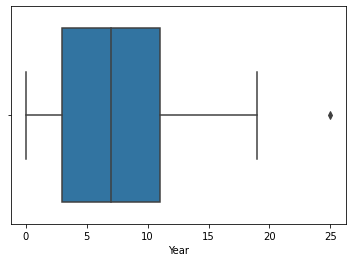

In [ ]:
sns.boxplot(x = df["Year"])

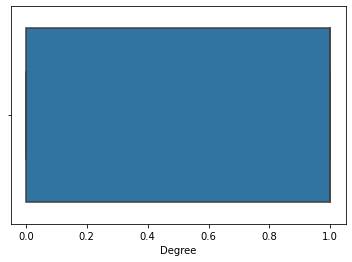

In [ ]:
sns.boxplot(x = df["Degree"])

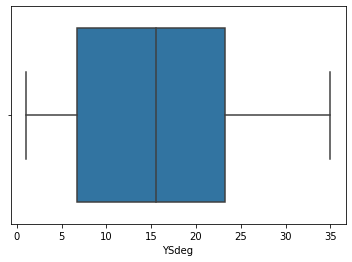

In [ ]:
sns.boxplot(x = df["YSdeg"])

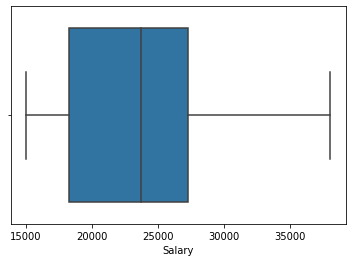

In [ ]:
sns.boxplot(x = df["Salary"])

### IQR Method

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


###Finding of Interquartile Range And Lower Limit And Upper Limit Method

In [ ]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Sex is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Sex


Interquartile Range of Rank is 2.0
Lower Limit  -2.0
Upper Limit  6.0
Outlier is Not Presented In Rank


Interquartile Range of Year is 8.0
Lower Limit  -9.0
Upper Limit  23.0
Outlier is Presented In Year


Interquartile Range of Degree is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Degree


Interquartile Range of YSdeg is 16.5
Lower Limit  -18.0
Upper Limit  48.0
Outlier is Not Presented In YSdeg


Interquartile Range of Salary is 9011.75
Lower Limit  4729.125
Upper Limit  40776.125
Outlier is Not Presented In Salary




###From Above Box Plot And Finding of Interquartile Range We Can Know Outliers Present In Year
###To Knowing Outlier Data Points In Our Feature And Target Variable 

In [ ]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)] # Here We Find The All outliers In Given Data set
    if outliers.shape[0] != 0:
      print("Outlier is Presented In " + i + " is")
      for j in outliers[i]:
        print(j)
      print("\n")
    else:
      print("No Outlier is Presented In",i )
    # if outliers.empty: 
    #   print("No Outlier is Presented In",i )
    # else:
    #   print("Outlier is Presented In " + i + "is")
    #   for j in outliers[i]:
    #     print(j)
    #   print("\n")
Outlier_Data_Points(df)

No Outlier is Presented In Sex
No Outlier is Presented In Rank
Outlier is Presented In Year is
25


No Outlier is Presented In Degree
No Outlier is Presented In YSdeg
No Outlier is Presented In Salary


###Here Only One Outliers Presented In Year, Thats Not Affect Our Model, So We Can Procced Further

##Finding The Relationship Between ("Sex", "Rank", "Year", "Degree", "YSdeg") To "Salary"

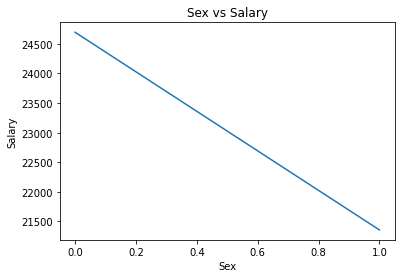

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

df[['Sex', 'Salary']].corr()

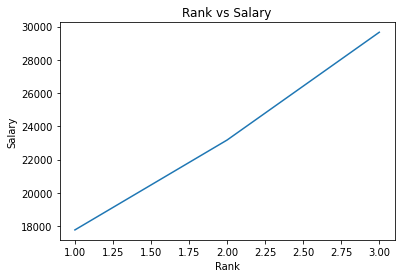

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
#df.plot(x = 'Rank', y='Salary', style = 'o')
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

df[['Rank', 'Salary']].corr()

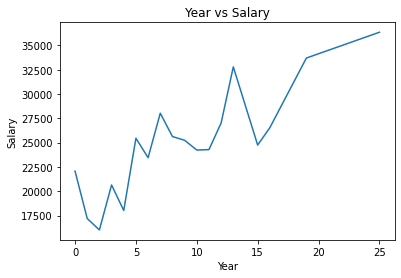

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.groupby('Year')['Salary'].mean().plot()
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

df[['Year', 'Salary']].corr()

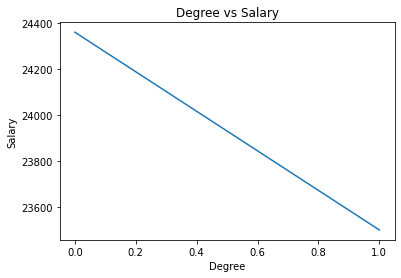

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

df[['Degree', 'Salary']].corr()

##From Plotting Degree Vs Salary We Can Find Straight Line Relationship But Correlation Value Shows Tha There is No Linear Relationship. We Consider The Degree As Our One of Feature to Develop Our Model

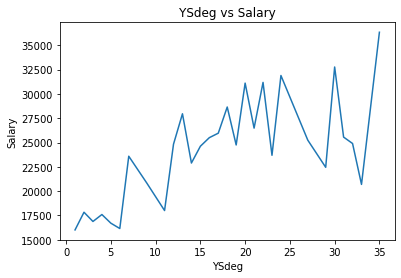

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

df[['YSdeg', 'Salary']].corr()

##From Above Observation We Can Consider ("Sex", "Rank", "Year", "Degree", "YSdeg") Feature to Develop Our Model

#1. Find the linear regression equation for this data using columns 1-5 to column 6.

##ANS: For This Data Set Linear Regression Equation is y = $B_0$ + x1$B_1$ + x2$B_2$ +......++ xn$B_n$
##n is Number Of Features
##$B_0$ Is Intercept And $B_0, B_1, B_2,....B_n$ Are Cofficients
##y is Our Target Variable, x Is Our Feature

##Spliting The Data Set In Train And Test For Developing Models

In [ ]:
X = df.loc[:, ["Sex", "Rank", "Year", "Degree", "YSdeg"]].values 
y = df.loc[:, 'Salary'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

##Scaling The Data Set

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

##Developing The Model

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([28887.02952781, 29426.57400482, 23074.53644172, 28540.36845393,
       25457.22218901, 21555.98100223, 18962.5998726 , 21372.19690045,
       29866.04049028, 30373.83764927, 16107.69878742, 22869.45858675,
       16429.97095763, 26138.34988493, 15599.90162843, 18976.31516693])

In [ ]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,27959,28887.029528
1,25500,29426.574005
2,22450,23074.536442
3,29342,28540.368454
4,22906,25457.222189
5,23725,21555.981002
6,23713,18962.599873
7,21600,21372.196900
8,27025,29866.040490
9,35350,30373.837649


In [ ]:
df_coff = pd.DataFrame(regressor.coef_ , ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns= ['Cofficient'])
df_coff

,Cofficient
Sex,929.457566
Rank,5310.095498
Year,3112.935207
Degree,-715.662197
YSdeg,-1907.195112


In [ ]:
print(regressor.intercept_) 

23947.555555555555


In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7801347152885464


##2. Find the selection of columns with the best $R^2$ score.

In [ ]:
def Selc_Col(df):
  for i in df.keys():
    if i != 'Salary':
      X = df.loc[:, [i]].values 
      y = df.loc[:, 'Salary'].values 
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
      scaler = StandardScaler() 
      scaler.fit(X_train,y_train) 
      X_train_scaled = scaler.transform(X_train) 
      X_test_scaled = scaler.transform(X_test) 
      regressor = LinearRegression()   
      regressor.fit(X_train_scaled, y_train)
      y_pred = regressor.predict(X_test_scaled) 
      print('R2- SCORE of ' + i + ' is: ', metrics.r2_score(y_test,y_pred))

In [ ]:
Selc_Col(df)

R2- SCORE of Sex is:  -0.012233465811496869
R2- SCORE of Rank is:  0.6723218219021224
R2- SCORE of Year is:  0.39359646731694975
R2- SCORE of Degree is:  -0.05577210942642963
R2- SCORE of YSdeg is:  0.3561736731232156


##ANS: From Above $R^2$ Score Observation Rank Feature Have High Score. From Cofficient Value And $R^2$ Score Rank Have High Impact in Salary Prediction

##3. Report whether sex is a factor in salary.

###ANS: Here Sex Is Not a Factor for Salary Prediction Because It Have Low Cofficient Value And Low $R^2$ Score